In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix as confucio
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import category_encoders as ce
from collections import Counter


def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confucio(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confucio(y_test, dt_classifier.predict(X_test)))

In [2]:
#DATASET 1

df = pd.read_csv('C:/Users/santi/OneDrive/Desktop/HR_comma_sep.csv')
df.columns

#distinct values for some categorical data
unique_list = []
for item in df['salary']: 
    if item not in unique_list: 
        unique_list.append(item) 

print(unique_list)
len(unique_list)

#Some data cleaning
#renaming columns names
df = df.rename(str.lower, axis='columns')
df = df.rename(columns={'sales': 'department'})
df.columns
      
#checking null values and shape
df.shape
df = df.dropna(axis=0)
df.isna().sum()

['low', 'medium', 'high']


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

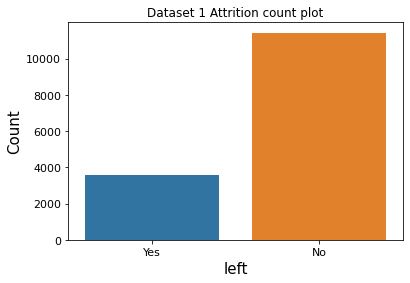

C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

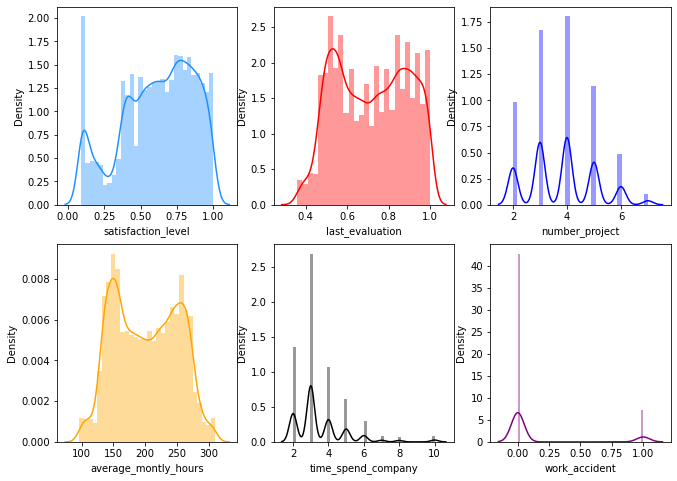

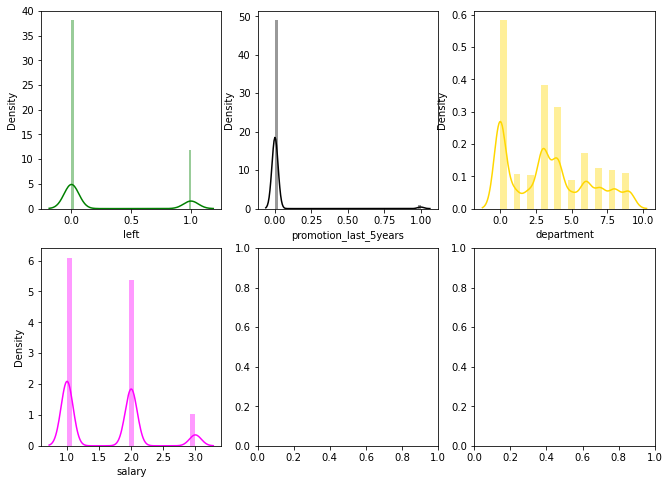

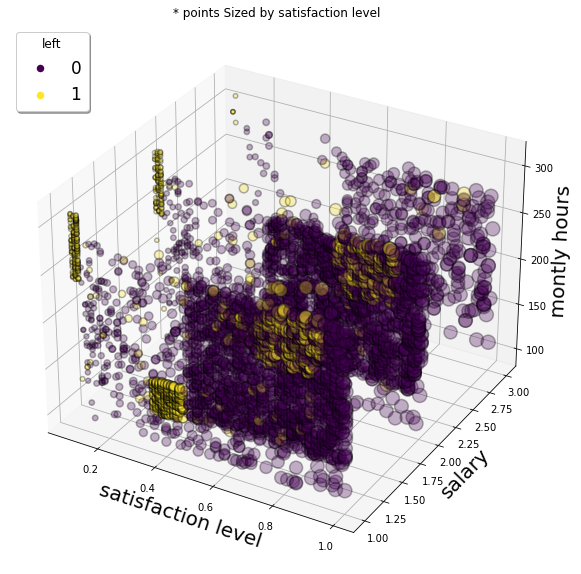

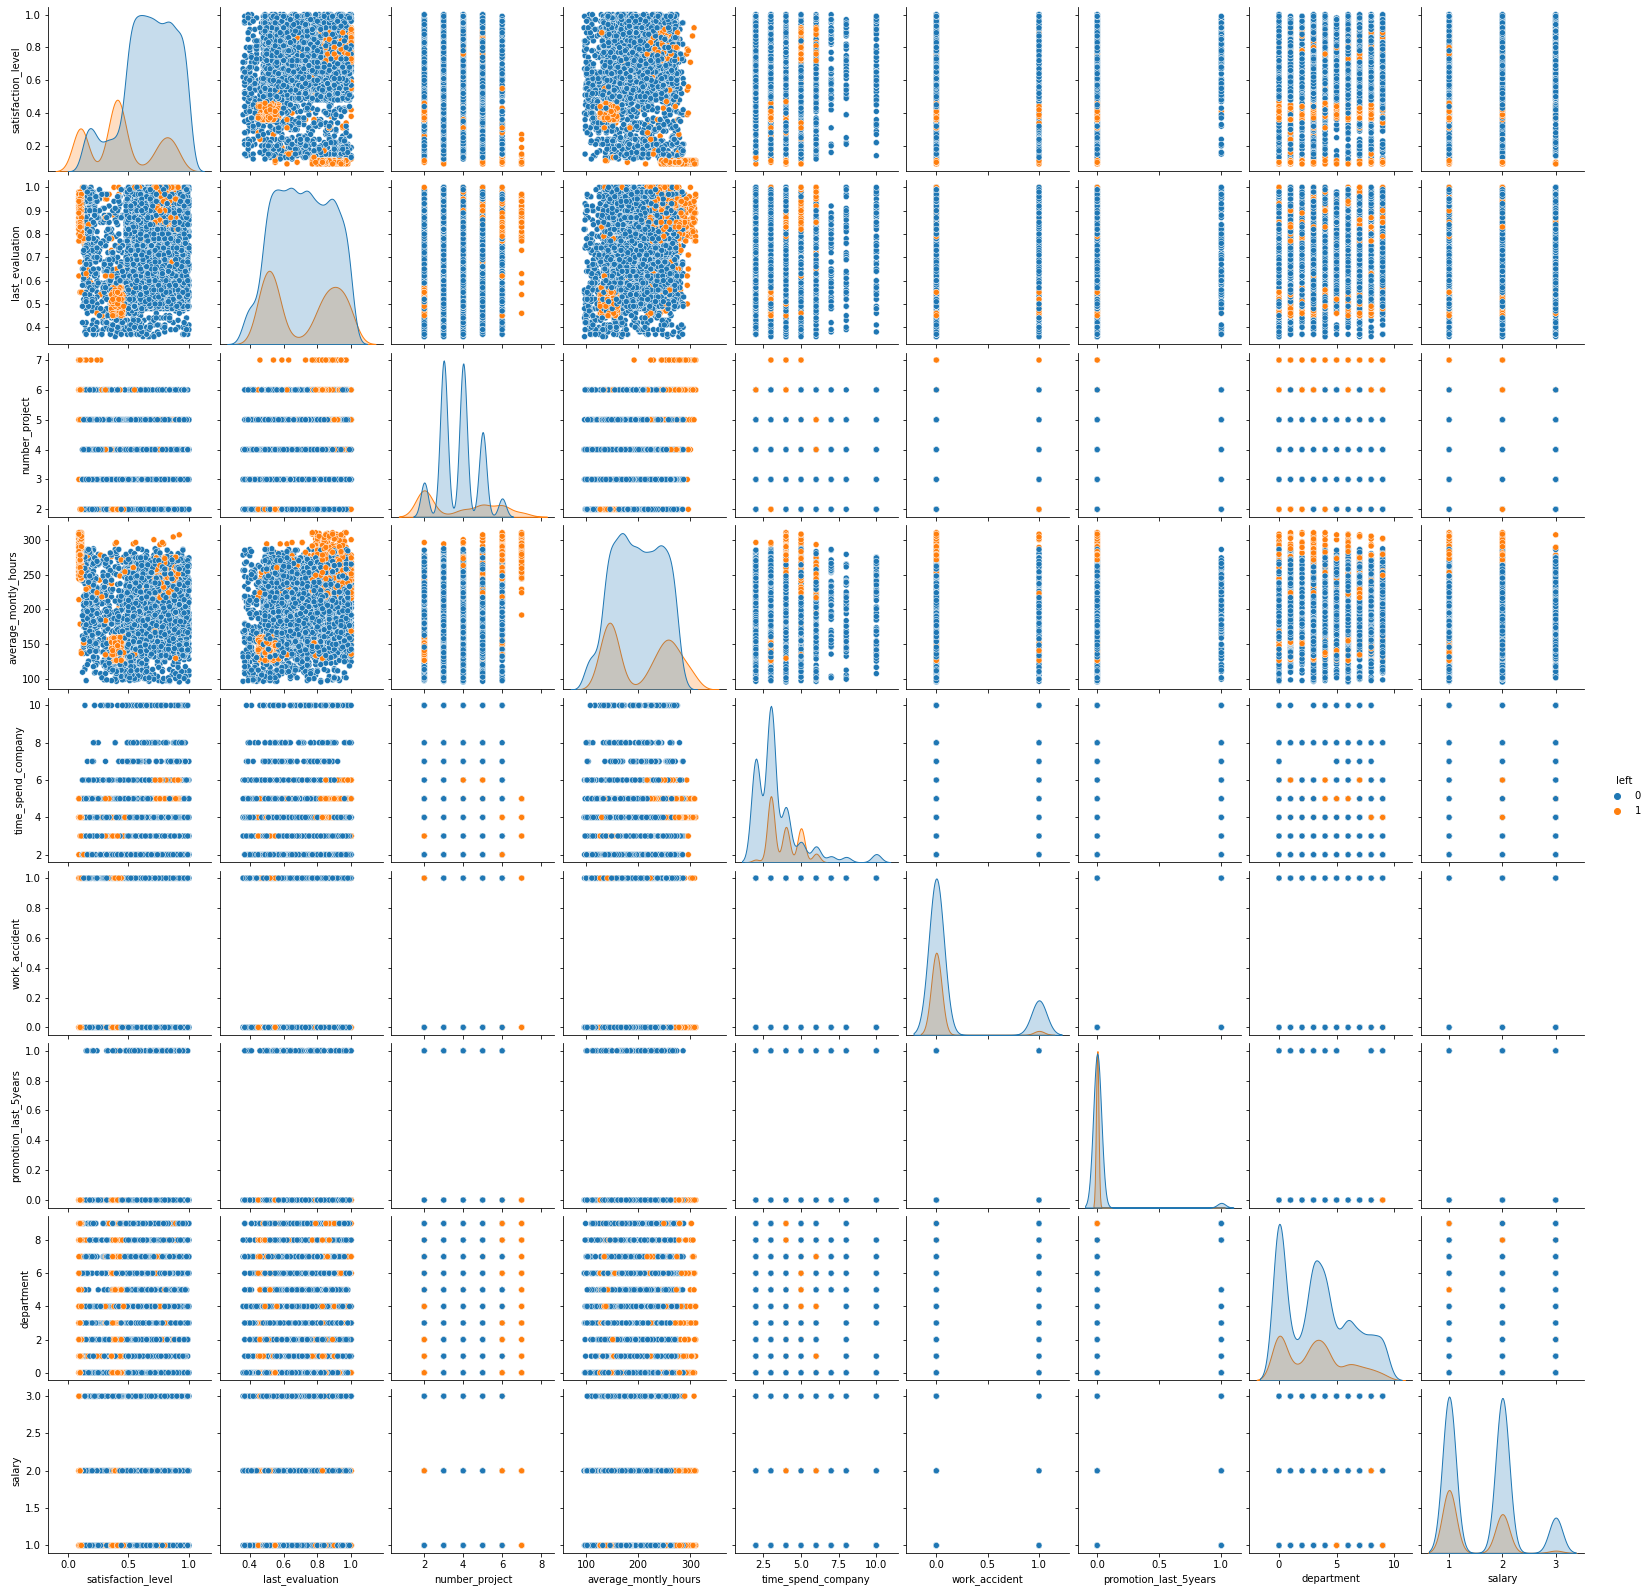

<bound method NDFrame._add_numeric_operations.<locals>.sum of        satisfaction_level  last_evaluation  number_project  \
0                   False            False           False   
1                   False            False           False   
2                   False            False           False   
3                   False            False           False   
4                   False            False           False   
...                   ...              ...             ...   
14994               False            False           False   
14995               False            False           False   
14996               False            False           False   
14997               False            False           False   
14998               False            False           False   

       average_montly_hours  time_spend_company  work_accident   left  \
0                     False               False          False  False   
1                     False               False

In [3]:
#Genreate PLOTS 

df['left']=df['left'].replace(0,'No')
df['left']=df['left'].replace(1,'Yes')

g = sns.countplot(data=df, x="left")
g.set_xlabel('left',fontsize=15)
g.set_ylabel('Count',fontsize=15)
g.tick_params(labelsize=11)
g.set_title('Dataset 1 Attrition count plot')
plt.show()

df['left']=df['left'].replace('No',0)
df['left']=df['left'].replace('Yes',1) 
df['department']=df['department'].replace('sales',0)
df['department']=df['department'].replace('accounting',1)
df['department']=df['department'].replace('hr',2)
df['department']=df['department'].replace('technical',3)
df['department']=df['department'].replace('support',4)
df['department']=df['department'].replace('management',5)
df['department']=df['department'].replace('IT',6)
df['department']=df['department'].replace('product_mng',7)
df['department']=df['department'].replace('marketing',8)
df['department']=df['department'].replace('RandD',9)
df['salary']=df['salary'].replace('low',1) 
df['salary']=df['salary'].replace('medium',2) 
df['salary']=df['salary'].replace('high',3) 

#ditribution plot

df1 = df.iloc[: , :6]
df2 = df.iloc[: , 6:12]
sns.color_palette("tab10")

n_rows=2
n_cols=3
palette = ('dodgerblue' ,'red','blue' ,'orange','black' ,'purple')
palette = iter(palette)
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(11, 8))
for i, column in enumerate(df1.columns):
     c = next(palette)
     sns.distplot(df1[column],ax=axes[i//n_cols,i%n_cols],color=c)

n_rows=2
n_cols=3
palette = ('green' ,'black','gold' ,'magenta','cyan' ,'deeppink')
palette = iter(palette)
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(11, 8))
for i, column in enumerate(df2.columns):
     c = next(palette)
     sns.distplot(df2[column],ax=axes[i//n_cols,i%n_cols],color=c)
     
df3d = df.sample(n=5000)

#3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df3d['satisfaction_level'],
           df3d['salary'], 
           df3d['average_montly_hours'], 
           s = df3d['satisfaction_level']*(200), 
           c = df3d['left'],
    cmap='viridis', alpha=0.3,linewidth=1.5,edgecolors='black')
ax.set_xlabel('satisfaction level', fontsize=20)
ax.set_ylabel('salary', fontsize=20)
ax.set_zlabel('montly hours', fontsize=20)
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend = ax.legend(handles, labels, loc='upper left',fontsize = 17,shadow = True)
legend.set_title('left',prop={'size':'large'})
ax.set_title('* points Sized by satisfaction level ')

plt.show()

# this next plot is taking a while to load
sns.pairplot(df3d,hue='left')
plt.show() 

df['department']=df['department'].replace(0,'sales')
df['department']=df['department'].replace(1,'accounting')
df['department']=df['department'].replace(2,'hr')
df['department']=df['department'].replace(3,'technical')
df['department']=df['department'].replace(4,'support')
df['department']=df['department'].replace(5,'management')
df['department']=df['department'].replace(6,'IT')
df['department']=df['department'].replace(7,'product_mng')
df['department']=df['department'].replace(8,'marketing')
df['department']=df['department'].replace(9,'RandD')
df['salary']=df['salary'].replace(1,'low') 
df['salary']=df['salary'].replace(2,'medium') 
df['salary']=df['salary'].replace(3,'high') 

df.isna().sum

In [4]:
# x and y
y = df['left']
x = df.drop(columns=['left'])
print(x.columns)

import category_encoders as ce
#encoder
ce = ce.LeaveOneOutEncoder(cols=['work_accident','promotion_last_5years', 'department', 'salary'],return_df=True)
x = ce.fit_transform(x,y)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


Feature: 0, Score: 0.06780
Feature: 1, Score: 0.01070
Feature: 2, Score: 0.01653
Feature: 3, Score: 0.00629
Feature: 4, Score: 0.02795
Feature: 5, Score: 0.23619
Feature: 6, Score: 0.58732
Feature: 7, Score: 0.00099
Feature: 8, Score: 0.04623


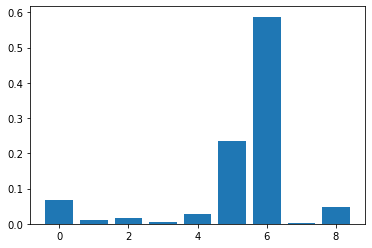

Before sampling:  Counter({0: 8004, 1: 2495})
After ADASYN:  Counter({1: 11429, 0: 11428})


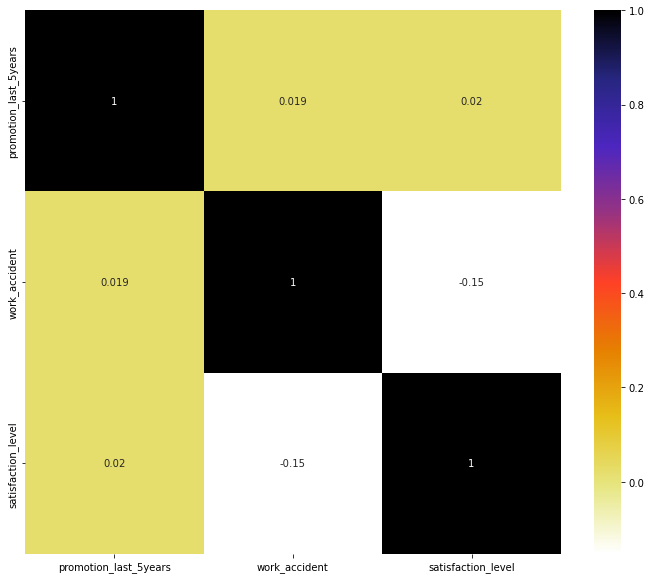

In [5]:
#Feature selection and splitting

# decision tree for feature importance on a classification problem
model = RandomForestClassifier()
#fit
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

x = x[['promotion_last_5years','work_accident','satisfaction_level']]


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

#ADASYN Oversampling
print("Before sampling: ", Counter(y_train))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_train, y_train = ada.fit_resample(x, y)
print("After ADASYN: ", Counter(y_train))

cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [6]:
#Modelling

#ADA
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


#train model with cv of 10
cv_scores = cross_val_score(abc, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))



ADA = {'model': 'ADA' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_ADA = confucio(y_test, y_pred)

print('ADA')
evaluate_model(abc)

[1.         1.         1.         0.99912511 1.         1.
 1.         1.         1.         1.        ]
cv_scores mean:0.999912510936133
ADA
Train Accuracy : 1.0
Train Confusion Matrix:
[[11428     0]
 [    0 11429]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[3424    0]
 [   0 1076]]


1.0


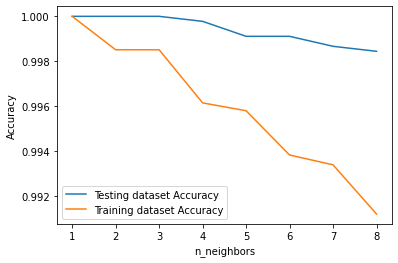

[0.99956255 0.99781277 0.99868766 0.99956255 0.92650919 0.96456693
 0.97156605 1.         0.99956236 1.        ]
cv_scores mean:0.9857830079773946
KNN
Train Accuracy : 0.991206195038719
Train Confusion Matrix:
[[11405    23]
 [  178 11251]]
--------------------------------------------------
Test Accuracy : 0.9984444444444445
Test Confusion Matrix:
[[3419    5]
 [   2 1074]]


In [7]:
#knn

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


#Checking for k value
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


#cv
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


KNN = {'model': 'KNN' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_KNN = confucio(y_test, y_pred)

print('KNN')
evaluate_model(knn)




In [8]:
#Naive Bayes
nb_model = Pipeline([
        ('classification', GaussianNB())
    ])
nb_model.get_params().keys()
nb_clf = GridSearchCV(estimator=nb_model, param_grid={}, scoring='recall', cv=5)
nb_clf.fit(X_train,y_train )


y_pred = nb_clf.predict(X_test)
model_nb_cm = confucio(y_test, y_pred)
model_nb_result = []
model_nb_result.append(precision_score(y_test, y_pred, average='macro'))
model_nb_result.append(recall_score(y_test, y_pred, average='macro'))
model_nb_result.append(accuracy_score(y_test, y_pred))
model_nb_result.append(f1_score(y_test, y_pred , average = 'binary'))


NB = {'model': 'NB' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_NB = confucio(y_test, y_pred)
print('NB')
evaluate_model(nb_clf)

NB
Train Accuracy : 0.6638666491665572
Train Confusion Matrix:
[[8694 2734]
 [4949 6480]]
--------------------------------------------------
Test Accuracy : 0.7062222222222222
Test Confusion Matrix:
[[2619  805]
 [ 517  559]]


tree
Train Accuracy : 1.0
Train Confusion Matrix:
[[11428     0]
 [    0 11429]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[3424    0]
 [   0 1076]]


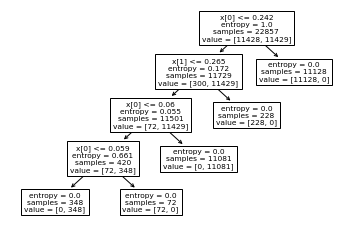

In [9]:
#Decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

y_pred = clf.predict(X_test)

TREE = {'model': 'TREE' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_TREE = confucio(y_test, y_pred)
print('tree')
evaluate_model(clf)

In [10]:
#Random forest
dt = RandomForestClassifier(random_state=42)

params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15, 20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9, 10,15, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
score_df.nlargest(5,"mean_test_score")
dt_best = grid_search.best_estimator_



FOREST = {'model': 'FOREST' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

print('Forest')
evaluate_model(grid_search)


Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Forest
Train Accuracy : 1.0
Train Confusion Matrix:
[[11428     0]
 [    0 11429]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[3424    0]
 [   0 1076]]


In [11]:
#Result dataset for dataset 1

TREE = pd.DataFrame(TREE, index=[0])
FOREST =pd.DataFrame(FOREST,index=[0])
NB = pd.DataFrame(NB,index=[0])
KNN = pd.DataFrame(KNN,index=[0])
ADA = pd.DataFrame(ADA,index=[0])

results = pd.concat([TREE, FOREST], axis=0)
results = pd.concat([results, NB], axis=0)
results = pd.concat([results, KNN], axis=0)
results = pd.concat([results, ADA], axis=0)

results['dataset'] = 'dataset 1'
print(results)

    model  precision    recall  accuracy        f1   ROC AUC    dataset
0    TREE   1.000000  1.000000  1.000000  1.000000  1.000000  dataset 1
0  FOREST   1.000000  1.000000  1.000000  1.000000  1.000000  dataset 1
0      NB   0.622482  0.642206  0.706222  0.458197  0.642206  dataset 1
0     KNN   1.000000  1.000000  1.000000  1.000000  1.000000  dataset 1
0     ADA   1.000000  1.000000  1.000000  1.000000  1.000000  dataset 1


In [12]:
#Dataset 2

data = pd.read_csv('C:/Users/santi/OneDrive/Desktop/IBM.csv')
data.columns

#checking values
for x in data.columns:
 print(data[x].value_counts())
 
#checking null values
for x in data.columns:
    a = data[x].isna().sum()
    if a>0:
        print(x  + '   ' + a)
        
data = data.drop(columns=['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR'])


1318    10
5169    10
5155    10
5157    10
5158    10
        ..
2568     1
2575     1
2578     1
2579     1
8264     1
Name: EmployeeID, Length: 6284, dtype: int64
12/31/2013 0:00     5215
12/31/2012 0:00     5101
12/31/2011 0:00     4972
12/31/2014 0:00     4962
12/31/2010 0:00     4840
                    ... 
09/01/2011 00:00       3
04/01/2015 00:00       3
08/01/2012 00:00       2
06/01/2014 00:00       2
07/01/2014 00:00       2
Name: recorddate_key, Length: 130, dtype: int64
3/23/1973     40
08/04/1954    40
4/27/1956     40
03/06/1956    30
7/13/1972     30
              ..
9/14/1941      1
09/12/1941     1
09/01/1941     1
8/29/1941      1
6/13/1994      1
Name: birthdate_key, Length: 5342, dtype: int64
9/25/2006     50
08/09/1992    50
2/26/2006     50
10/16/2005    50
12/04/2004    50
              ..
06/02/1993     1
07/09/1997     1
7/24/1997      1
7/25/1997      1
8/27/2013      1
Name: orighiredate_key, Length: 4415, dtype: int64
01/01/1900    42450
12/30/2014     107

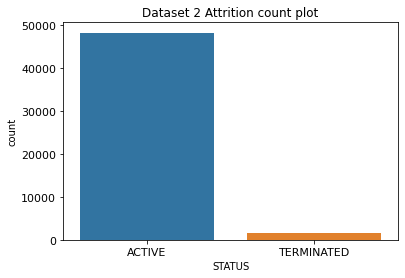

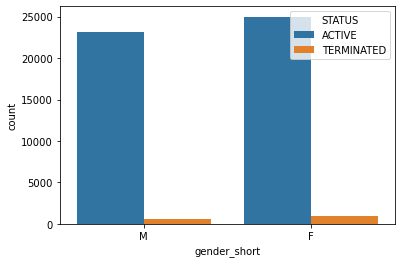

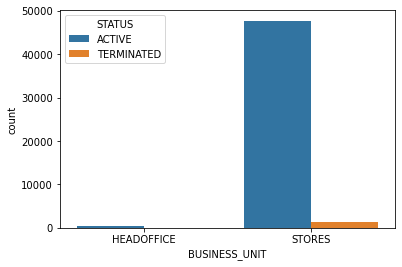

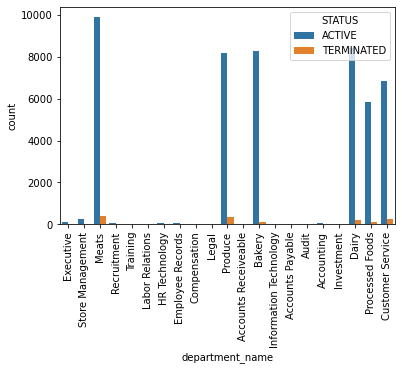

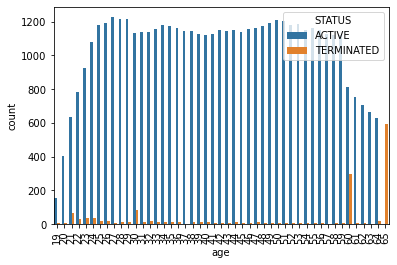

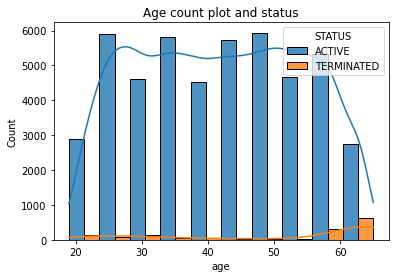

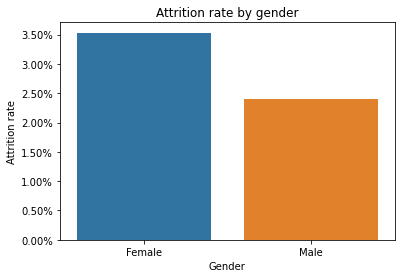

C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

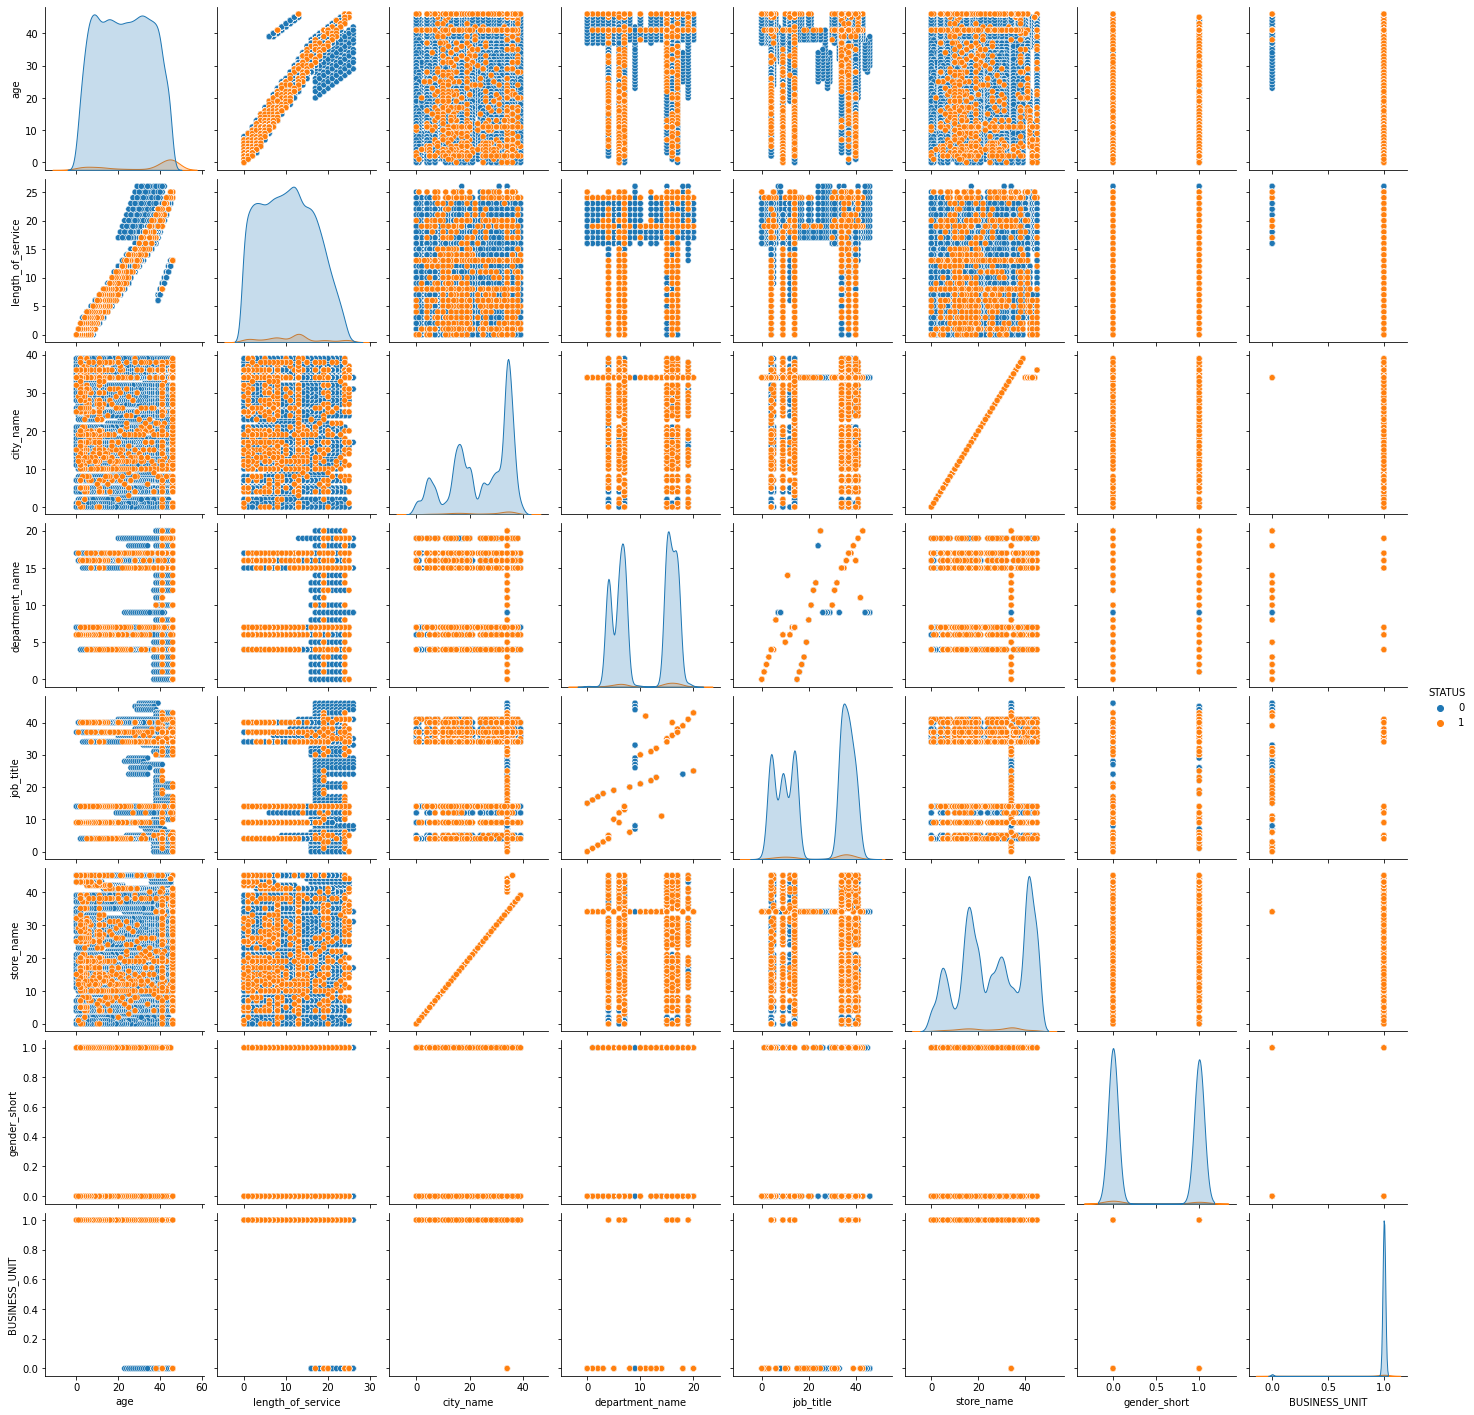

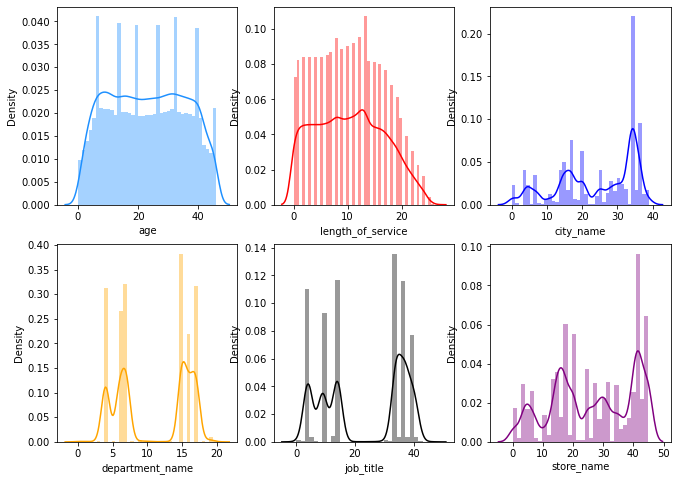

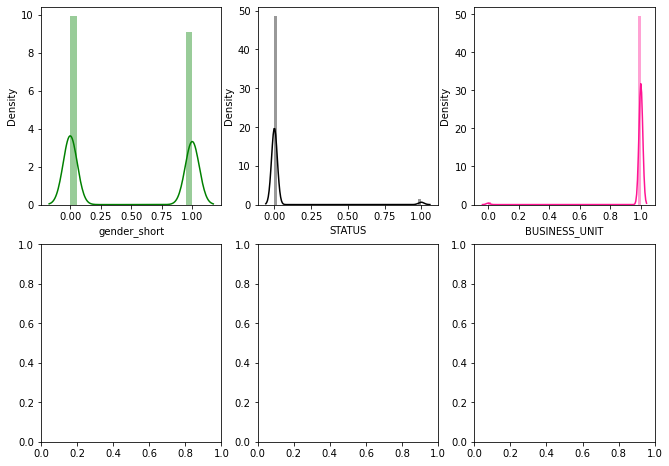

In [13]:
#charts and plots

g = sns.countplot(data=data, x="STATUS")
g.tick_params(labelsize=11)
g.set_title('Dataset 2 Attrition count plot')
plt.show() 

dd = data
sns.countplot(data=dd,  x='gender_short', hue='STATUS')
plt.show()
sns.countplot(data=dd,  x='BUSINESS_UNIT', hue='STATUS')
plt.show()
sns.countplot(data=dd,  x='department_name', hue='STATUS')
plt.xticks(rotation = 90)
plt.show()
sns.countplot(data=dd,  x='age', hue= 'STATUS')
plt.xticks(rotation = 90)
plt.show()


bins = 10
ax1 = sns.histplot(data=dd, x="age", hue='STATUS', multiple="dodge",bins=bins,alpha=.8,kde=True)
sns.move_legend(ax1, "upper right")
ax1.set_title('Age count plot and status')
plt.show()



male = dd[dd['gender_short']=='M']
fem = dd[dd['gender_short']=='F']
ter_M =  male[male['STATUS']=='TERMINATED']
ter_F = fem[fem['STATUS']=='TERMINATED']


import matplotlib.ticker as mtick

plot = {'Gender': ('Female','Male') , 'Attrition rate': (len(ter_F) / len(fem) * 100, len(ter_M) / len(male) * 100)}
plot = pd.DataFrame(plot)
fig = sns.barplot(data = plot, x='Gender',y='Attrition rate')
fig.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.title("Attrition rate by gender")
plt.show()


#encoding for charts
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in dd.columns:
 label = le.fit_transform(dd[x])
 dd.drop(x, axis=1, inplace=True)
 dd[x] = label


sns.pairplot(data=dd, hue='STATUS')


#ditribution plot
df1 = dd.iloc[: , :6]
df2 = dd.iloc[: , 6:12]

sns.color_palette("tab10")
n_rows=2
n_cols=3
palette = ('dodgerblue' ,'red','blue' ,'orange','black' ,'purple')
palette = iter(palette)
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(11, 8))
for i, column in enumerate(df1.columns):
     c = next(palette)
     sns.distplot(df1[column],ax=axes[i//n_cols,i%n_cols],color=c)

n_rows=2
n_cols=3
palette = ('green' ,'black','deeppink' ,'magenta','cyan' ,'deeppink')
palette = iter(palette)
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(11, 8))
for i, column in enumerate(df2.columns):
     c = next(palette)
     sns.distplot(df2[column],ax=axes[i//n_cols,i%n_cols],color=c)
plt.show()


data['STATUS'] = data['STATUS'].replace('ACTIVE',0)
data['STATUS'] = data['STATUS'].replace('TERMINATED',1)

Feature: 0, Score: 0.20364
Feature: 1, Score: 0.00369
Feature: 2, Score: 0.02300
Feature: 3, Score: 0.01455
Feature: 4, Score: 0.00956
Feature: 5, Score: 0.02117
Feature: 6, Score: 0.18286
Feature: 7, Score: 0.54153


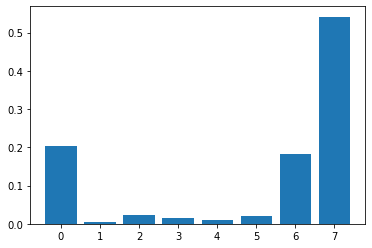

In [14]:
#X and Y
y = data['STATUS']
x = data.drop(columns=['STATUS'])

#Leave one out encoder
import category_encoders as ce
ce = ce.LeaveOneOutEncoder(cols=['city_name','department_name', 'store_name', 
                                 'gender_short','BUSINESS_UNIT','job_title'],return_df=True)

x = ce.fit_transform(x,y)

# decision tree for feature importance on a classification problem
model = RandomForestClassifier()
# fit the model
model.fit(x,y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


x = x[['age','gender_short','BUSINESS_UNIT']]

Before resampling:  Counter({0: 33741, 1: 1016})
After ADASYN:  Counter({1: 33780, 0: 33741})


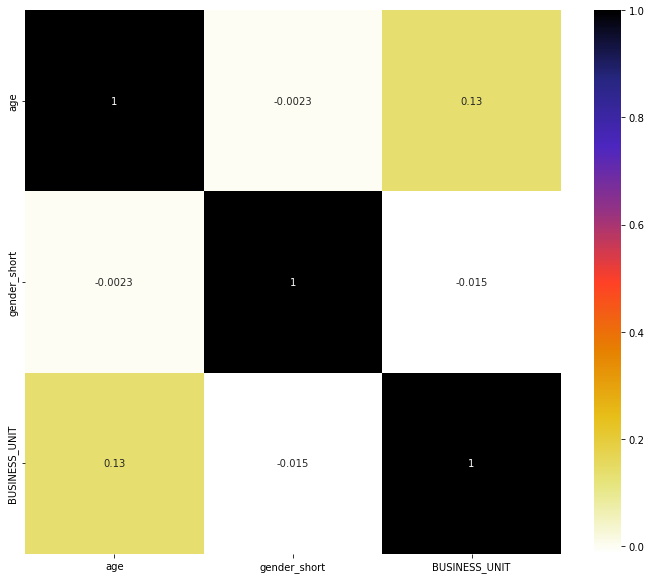

In [15]:
#split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)

#adasyn resampling
print("Before resampling: ", Counter(y_train))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_train, y_train= ada.fit_resample(X_train,y_train)
print("After ADASYN: ", Counter(y_train))

#correlation matrix
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

[1.         0.99955569 1.         1.         1.        ]
cv_scores mean:0.9999111374407583
ADA
Train Accuracy : 1.0
Train Confusion Matrix:
[[33741     0]
 [    0 33780]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[14427     0]
 [    0   469]]
0.9991272824919442


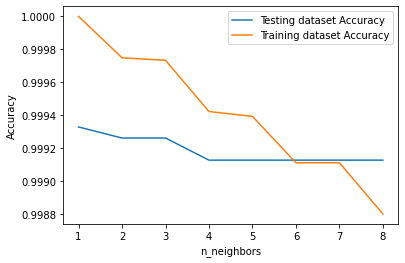

[0.92580526 0.98430095 0.98859597 0.98763329 0.9688981 ]
cv_scores mean:0.9710467149695303
knn
Train Accuracy : 0.9993927815050132
Train Confusion Matrix:
[[33738     3]
 [   38 33742]]
--------------------------------------------------
Test Accuracy : 0.9991272824919442
Test Confusion Matrix:
[[14427     0]
 [   13   456]]


In [16]:

#ADA
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


#cv
#create a new KNN model

#train model with cv of 5 
cv_scores = cross_val_score(abc, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
ADA2 = {'model': 'ADA' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

print('ADA')
CM_ADA2 = confucio(y_test, y_pred)

evaluate_model(abc)


#knn

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


#Checking for k value
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


#cv
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
knn_cv.fit(X_train, y_train)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

print('knn')
evaluate_model(knn_cv)


KNN2 = {'model': 'KNN' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_KNN2 = confucio(y_test, y_pred)

NB
Train Accuracy : 0.5476814620636543
Train Confusion Matrix:
[[ 5110 28631]
 [ 1910 31870]]
--------------------------------------------------
Test Accuracy : 0.17877282491944146
Test Confusion Matrix:
[[ 2270 12157]
 [   76   393]]
[1.         0.99955569 1.         1.         1.        ]
cv_scores mean:0.9999111374407583
TREE
Train Accuracy : 1.0
Train Confusion Matrix:
[[33741     0]
 [    0 33780]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[14427     0]
 [    0   469]]


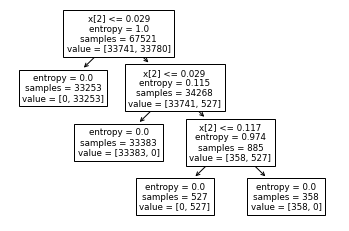

In [17]:
#NB
nb_model = Pipeline([
        ('classification', GaussianNB())
    ])
nb_model.get_params().keys()
nb_clf = GridSearchCV(estimator=nb_model, param_grid={}, scoring='recall', cv=5)
nb_clf.fit(X_train, y_train)


y_pred = nb_clf.predict(X_test)
model_nb_cm = confucio(y_test, y_pred)
NB2 = {'model': 'NB' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_NB2 = confucio(y_test, y_pred)
print('NB')
evaluate_model(nb_clf)

#Decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

y_pred= clf.predict(X_test)
model_tree_cm = confucio(y_test, y_pred)


#cv

#train model with cv of 5 
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


TREE2 = {'model': 'TREE' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }
print('TREE')
CM_TREE2 = confucio(y_test, y_pred)

evaluate_model(clf)



In [18]:

#forest
dt = RandomForestClassifier(random_state=42)

params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15, 20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9, 10,15, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
score_df.nlargest(5,"mean_test_score")
dt_best = grid_search.best_estimator_


FOREST2 = {'model': 'FOREST' ,'precision':precision_score(y_test, y_pred, average='macro'),
 'recall':recall_score(y_test, y_pred, average='macro'),
 'accuracy': accuracy_score(y_test, y_pred),
 'f1': f1_score(y_test, y_pred , average = 'binary'),
  'ROC AUC': roc_auc_score(y_test, y_pred) }

CM_FOREST2 = confucio(y_test, y_pred)
print('Forest')
evaluate_model(grid_search)




Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Forest
Train Accuracy : 1.0
Train Confusion Matrix:
[[33741     0]
 [    0 33780]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[14427     0]
 [    0   469]]


    model  precision    recall  accuracy        f1   ROC AUC    dataset
0    TREE    1.00000  1.000000  1.000000  1.000000  1.000000  dataset 2
0  FOREST    1.00000  1.000000  1.000000  1.000000  1.000000  dataset 2
0      NB    0.49946  0.497648  0.178773  0.060373  0.497648  dataset 2
0     KNN    1.00000  1.000000  1.000000  1.000000  1.000000  dataset 2
0     ADA    1.00000  1.000000  1.000000  1.000000  1.000000  dataset 2
     model    dataset     metric     score
0     TREE  dataset 2  precision  1.000000
1   FOREST  dataset 2  precision  1.000000
2       NB  dataset 2  precision  0.499460
3      KNN  dataset 2  precision  1.000000
4      ADA  dataset 2  precision  1.000000
5     TREE  dataset 1  precision  1.000000
6   FOREST  dataset 1  precision  1.000000
7       NB  dataset 1  precision  0.622482
8      KNN  dataset 1  precision  1.000000
9      ADA  dataset 1  precision  1.000000
10    TREE  dataset 2     recall  1.000000
11  FOREST  dataset 2     recall  1.000000
12      N

C:\Users\santi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\santi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(ms

Text(0.5, 0.98, 'DATASET 2')

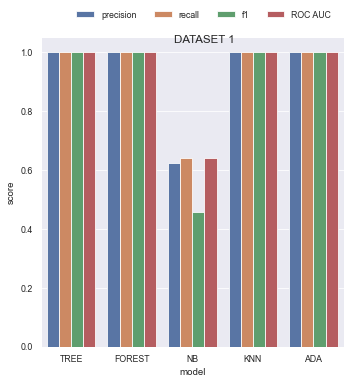

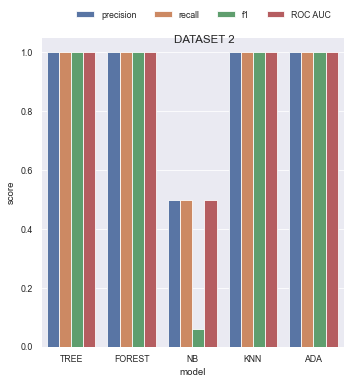

In [19]:
TREE2 = pd.DataFrame(TREE2, index=[0])
FOREST2 =pd.DataFrame(FOREST2,index=[0])
NB2 = pd.DataFrame(NB2,index=[0])
KNN2 = pd.DataFrame(KNN2,index=[0])
ADA2 = pd.DataFrame(ADA2,index=[0])

results2 = pd.concat([TREE2, FOREST2], axis=0)
results2 = pd.concat([results2, NB2], axis=0)
results2 = pd.concat([results2, KNN2], axis=0)
results2 = pd.concat([results2, ADA2], axis=0)
results2['dataset'] = 'dataset 2'
print(results2)



results_final = pd.concat([results2, results], axis=0)

results_final = results_final.melt(id_vars =['model','dataset'], 
              value_vars =['precision','recall','f1','ROC AUC'], var_name = 'metric')


results_final.rename(columns = {'value':'score'}, inplace = True)
print(results_final)
results_final1 = results_final[results_final['dataset']== 'dataset 1']
results_final2 = results_final[results_final['dataset']== 'dataset 2']


sns.set_style('darkgrid')
sns.set_theme('paper')
ax = sns.factorplot("model", "score",'metric',data=results_final1, kind="bar")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,)
ax.fig.suptitle('DATASET 1')
ax = sns.factorplot("model", "score",'metric',data=results_final2, kind="bar")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,)
ax.fig.suptitle('DATASET 2')